In [1]:
import pandas as pd;
data= pd.read_csv('dataset.csv');
print(data)

     Index Number  Rank                                Country/Economy  \
0              NaN  NaN                                            NaN   
1              0.0    1                                  United States   
2              1.0    2                                          China   
3              2.0    3                                          Japan   
4              3.0    4                                        Germany   
..             ...  ...                                            ...   
226          225.0    -  Saint Helena, Ascension, and Tristan da Cunha   
227          226.0    -                                        Tokelau   
228          227.0    -                       Turks and Caicos Islands   
229          228.0    -                              Wallis and Futuna   
230          229.0    -                                 Western Sahara   

    GDP (millions of $) Agriculture GDP Unnamed: 5 Unnamed: 6 Industry  \
0                   NaN             G

In [2]:

print(data.head())

# Check data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

# Check summary statistics
print(data.describe(include='all'))


   Index Number  Rank Country/Economy GDP (millions of $) Agriculture GDP  \
0            NaN  NaN             NaN                 NaN             GDP   
1            0.0    1   United States            19360000          174240   
2            1.0    2           China            11940000          991020   
3            2.0    3           Japan             4884000           48840   
4            3.0    4         Germany             3652000           21912   

  Unnamed: 5 Unnamed: 6 Industry Unnamed: 8 Unnamed: 9  Services Unnamed: 11  \
0       Rank   % of GDP      GDP       Rank   % of GDP       GDP        Rank   
1          3        0.9  3659040          2       18.9  15526720           1   
2          1        8.3  4716300          1       39.5   6232680           2   
3         13          1  1450548          3       29.7   3384612           3   
4         31        0.6  1099252          4       30.1   2530836           4   

  Unnamed: 12 Year GDP  Year Sector  
0    % of GDP     

In [3]:
#DATA UNDERSTANDING AND CLEANING

# Question 1: Are there any missing values in the dataset?

import pandas as pd
import numpy as np

# Convert columns to numeric where possible, coercing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with the median of each column
data.fillna(data.median(numeric_only=True), inplace=True)


Missing values in each column:
 Index Number             1
Rank                     7
Country/Economy        231
GDP (millions of $)      7
Agriculture GDP         13
Unnamed: 5              13
Unnamed: 6               7
Industry                11
Unnamed: 8              11
Unnamed: 9               8
Services                10
Unnamed: 11             10
Unnamed: 12              7
Year GDP                 7
Year Sector              7
dtype: int64


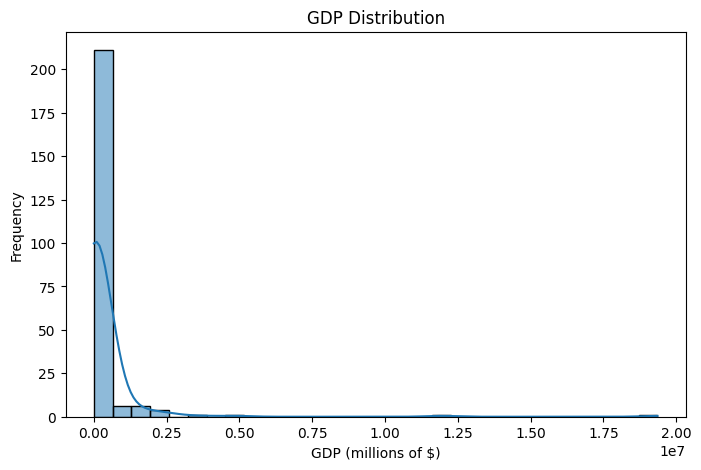

In [4]:
# Question 2: What is the distribution of GDP values?

import matplotlib.pyplot as plt
import seaborn as sns

# Plot GDP distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['GDP (millions of $)'], bins=30, kde=True)
plt.title("GDP Distribution")
plt.xlabel("GDP (millions of $)")
plt.ylabel("Frequency")
plt.show()


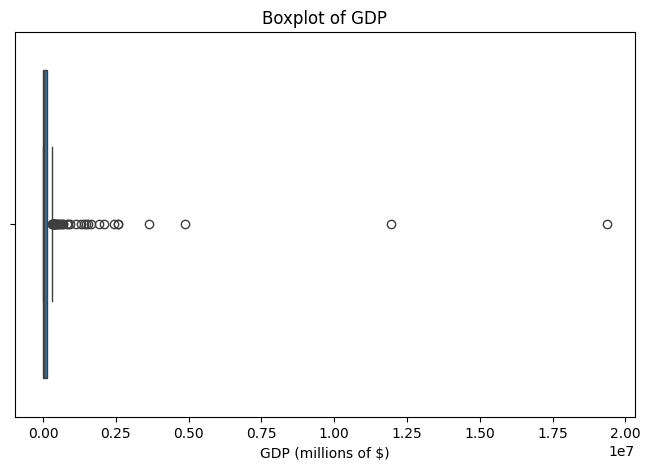

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['GDP (millions of $)'])
plt.title("Boxplot of GDP")
plt.show()


In [6]:
# 2. Statistical Outlier Detection (Extreme Value Analysis)

# Question 3: Which GDP values are extreme according to the IQR method?

Q1 = data['GDP (millions of $)'].quantile(0.25)
Q3 = data['GDP (millions of $)'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = data[(data['GDP (millions of $)'] < lower_bound) | (data['GDP (millions of $)'] > upper_bound)]
print("Outliers detected using IQR:\n", outliers_iqr[['Country/Economy', 'GDP (millions of $)']])


Outliers detected using IQR:
     Country/Economy  GDP (millions of $)
1               NaN           19360000.0
2               NaN           11940000.0
3               NaN            4884000.0
4               NaN            3652000.0
5               NaN            2575000.0
6               NaN            2565000.0
7               NaN            2439000.0
8               NaN            2081000.0
9               NaN            1921000.0
10              NaN            1640000.0
11              NaN            1530000.0
12              NaN            1469000.0
13              NaN            1390000.0
14              NaN            1307000.0
15              NaN            1142000.0
16              NaN             923300.0
17              NaN             841200.0
18              NaN             824500.0
19              NaN             683700.0
20              NaN             680600.0
21              NaN             619900.0
22              NaN             571500.0
23              NaN        

In [7]:
# Question 4: Which countries have extreme GDP values based on Z-score?
from scipy.stats import zscore

# Compute Z-scores
data['GDP_zscore'] = zscore(data['GDP (millions of $)'])

# Define threshold (common choice: |z| > 3)
outliers_z = data[np.abs(data['GDP_zscore']) > 3]
print("Outliers detected using Z-score:\n", outliers_z[['Country/Economy', 'GDP (millions of $)']])


Outliers detected using Z-score:
    Country/Economy  GDP (millions of $)
1              NaN           19360000.0
2              NaN           11940000.0


In [8]:
#  Distance-Based Outlier Detection

# Question 5: Which GDP values are farthest from their neighbors?

from sklearn.neighbors import NearestNeighbors
import numpy as np

# Ensure gdp_values is properly shaped
gdp_values = data[['GDP (millions of $)']].dropna().values.reshape(-1, 1)

# Fit Nearest Neighbors model
nbrs = NearestNeighbors(n_neighbors=5)
nbrs.fit(gdp_values)

# Compute distances to the 5 nearest neighbors
distances, indices = nbrs.kneighbors(gdp_values)

# Calculate the mean distance to the 5 nearest neighbors (outlier score)
outlier_scores = distances.mean(axis=1)

# Identify the top 10 outliers (largest outlier scores)
outliers_knn = data.iloc[np.argsort(outlier_scores)[-10:]]

# Print the detected outliers
print("Top 10 Outliers using Distance-Based method:\n", outliers_knn[['Country/Economy', 'GDP (millions of $)']])


Top 10 Outliers using Distance-Based method:
     Country/Economy  GDP (millions of $)
15              NaN            1142000.0
7               NaN            2439000.0
6               NaN            2565000.0
9               NaN            1921000.0
5               NaN            2575000.0
8               NaN            2081000.0
4               NaN            3652000.0
3               NaN            4884000.0
2               NaN           11940000.0
1               NaN           19360000.0


In [9]:
# Density-Based Outlier Detection (DBSCAN & LOF)

#Question 6: Are there any GDP values located in sparse regions?

from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
data['DBSCAN_Labels'] = dbscan.fit_predict(gdp_values)

# Identify outliers (DBSCAN assigns -1 to outliers)
outliers_dbscan = data[data['DBSCAN_Labels'] == -1]
print("Outliers detected using DBSCAN:\n", outliers_dbscan[['Country/Economy', 'GDP (millions of $)']])


Outliers detected using DBSCAN:
      Country/Economy  GDP (millions of $)
1                NaN           19360000.0
2                NaN           11940000.0
3                NaN            4884000.0
4                NaN            3652000.0
5                NaN            2575000.0
..               ...                  ...
220              NaN                186.0
221              NaN                175.0
222              NaN                114.0
223              NaN                 40.0
224              NaN                 10.0

[224 rows x 2 columns]


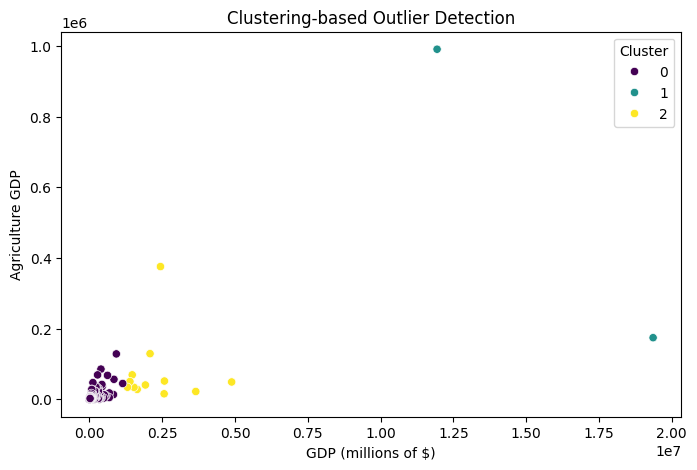

In [10]:
#Clustering-based Outlier Detection (K-Means)

from sklearn.cluster import KMeans

# Reshape data for clustering
gdp_values = data[['GDP (millions of $)']].dropna()

# Apply K-Means clustering (choose 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(gdp_values)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['GDP (millions of $)'], y=data['Agriculture GDP'], hue=data['Cluster'], palette='viridis')
plt.title("Clustering-based Outlier Detection")
plt.show()



In [11]:
 #Question 7: Which GDP values have the lowest density?

from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Extract GDP values for outlier detection
X = data[['GDP (millions of $)']].dropna().values  # Ensure it is a NumPy array

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=5)
lof_scores = lof.fit_predict(X)

# Add LOF scores to the dataframe
data['LOF_Score'] = np.nan
data.loc[data[['GDP (millions of $)']].dropna().index, 'LOF_Score'] = lof_scores

# Find outliers (LOF Score == -1)
outliers_lof = data[data['LOF_Score'] == -1]
print("Outliers detected using LOF:\n", outliers_lof[['Country/Economy', 'GDP (millions of $)', 'LOF_Score']])



Outliers detected using LOF:
      Country/Economy  GDP (millions of $)  LOF_Score
1                NaN           19360000.0       -1.0
2                NaN           11940000.0       -1.0
3                NaN            4884000.0       -1.0
4                NaN            3652000.0       -1.0
41               NaN             278900.0       -1.0
42               NaN             263200.0       -1.0
43               NaN             252500.0       -1.0
44               NaN             246600.0       -1.0
45               NaN             223300.0       -1.0
54               NaN             192700.0       -1.0
55               NaN             175500.0       -1.0
56               NaN             166300.0       -1.0
57               NaN             156200.0       -1.0
87               NaN              46670.0       -1.0
88               NaN              45460.0       -1.0
89               NaN              41670.0       -1.0
96               NaN              37820.0       -1.0
111             

C:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [12]:
# Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
data['LOF_Score'] = lof.fit_predict(gdp_values)

# Outliers are labeled as -1
outliers_lof = data[data['LOF_Score'] == -1]
print("Outliers detected using LOF:\n", outliers_lof[['Country/Economy', 'GDP (millions of $)']])


Outliers detected using LOF:
     Country/Economy  GDP (millions of $)
1               NaN           19360000.0
2               NaN           11940000.0
3               NaN            4884000.0
4               NaN            3652000.0
5               NaN            2575000.0
6               NaN            2565000.0
7               NaN            2439000.0
8               NaN            2081000.0
9               NaN            1921000.0
10              NaN            1640000.0
11              NaN            1530000.0
12              NaN            1469000.0
13              NaN            1390000.0
14              NaN            1307000.0
15              NaN            1142000.0
16              NaN             923300.0
17              NaN             841200.0
18              NaN             824500.0
19              NaN             683700.0
20              NaN             680600.0
21              NaN             619900.0
22              NaN             571500.0


In [13]:
# Local Reachability Distance
import numpy as np

# Compute reachability distance (LOF uses this internally)
reachability_distance = np.max(distances, axis=1)

# Find top 10 outliers
outliers_lrd = data.iloc[np.argsort(reachability_distance)[-10:]]
print("Top 10 Outliers using Local Reachability Distance:\n", outliers_lrd[['Country/Economy', 'GDP (millions of $)']])


Top 10 Outliers using Local Reachability Distance:
     Country/Economy  GDP (millions of $)
15              NaN            1142000.0
9               NaN            1921000.0
8               NaN            2081000.0
7               NaN            2439000.0
6               NaN            2565000.0
5               NaN            2575000.0
4               NaN            3652000.0
3               NaN            4884000.0
2               NaN           11940000.0
1               NaN           19360000.0


In [14]:
#Supervised & Unsupervised Outlier Detection

# Question 8: Can an Isolation Forest detect GDP anomalies?

from sklearn.ensemble import IsolationForest
import numpy as np

# Extract GDP values
X = data[['GDP (millions of $)']].dropna().values  # Convert to NumPy array

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['IF_Prediction'] = np.nan
data.loc[data[['GDP (millions of $)']].dropna().index, 'IF_Prediction'] = iso_forest.fit_predict(X)

# Find anomalies
outliers_if = data[data['IF_Prediction'] == -1]
print("Outliers detected using Isolation Forest:\n", outliers_if[['Country/Economy', 'GDP (millions of $)']])


Outliers detected using Isolation Forest:
     Country/Economy  GDP (millions of $)
1               NaN           19360000.0
2               NaN           11940000.0
3               NaN            4884000.0
4               NaN            3652000.0
5               NaN            2575000.0
6               NaN            2565000.0
7               NaN            2439000.0
8               NaN            2081000.0
9               NaN            1921000.0
10              NaN            1640000.0
11              NaN            1530000.0
15              NaN            1142000.0


In [15]:
#Question 9: How does One-Class SVM perform on GDP outliers?

from sklearn.svm import OneClassSVM

# Extract GDP values
X = data[['GDP (millions of $)']].dropna().values  # Convert to NumPy array

# Apply One-Class SVM
svm = OneClassSVM(nu=0.05, kernel="rbf")
data['SVM_Prediction'] = np.nan
data.loc[data[['GDP (millions of $)']].dropna().index, 'SVM_Prediction'] = svm.fit_predict(X)

# Find anomalies
outliers_svm = data[data['SVM_Prediction'] == -1]
print("Outliers detected using One-Class SVM:\n", outliers_svm[['Country/Economy', 'GDP (millions of $)']])


Outliers detected using One-Class SVM:
      Country/Economy  GDP (millions of $)
1                NaN           19360000.0
2                NaN           11940000.0
3                NaN            4884000.0
4                NaN            3652000.0
5                NaN            2575000.0
6                NaN            2565000.0
10               NaN            1640000.0
11               NaN            1530000.0
214              NaN                321.0
215              NaN                304.0
216              NaN                300.0
217              NaN                261.0
218              NaN                206.0
219              NaN                199.0
220              NaN                186.0
221              NaN                175.0
222              NaN                114.0
223              NaN                 40.0
224              NaN                 10.0


In [16]:
# Question 10: What is the Local Reachability Distance (LRD) of GDP outliers?

from sklearn.neighbors import NearestNeighbors
import numpy as np

# Extract GDP values
X = data[['GDP (millions of $)']].dropna().values  # Convert to NumPy array

# Compute K-Nearest Neighbors distances
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances, _ = nbrs.kneighbors(X)

# Store the average distance to k-nearest neighbors
data['KNN_Distance'] = np.nan
data.loc[data[['GDP (millions of $)']].dropna().index, 'KNN_Distance'] = distances.mean(axis=1)

# Compute Local Reachability Distance (LRD)
data['LRD'] = 1 / (data['KNN_Distance'] + 1e-5)

# Identify top LOF outliers
top_lof = data.nlargest(10, 'LOF_Score')

print("Top 10 Local Outliers:\n", top_lof[['Country/Economy', 'GDP (millions of $)', 'LOF_Score', 'LRD']])



Top 10 Local Outliers:
     Country/Economy  GDP (millions of $)  LOF_Score            LRD
0               NaN              21680.0          1  100000.000000
23              NaN             541900.0          1       0.000026
24              NaN             510000.0          1       0.000027
25              NaN             491700.0          1       0.000027
26              NaN             437800.0          1       0.000039
27              NaN             427700.0          1       0.000052
28              NaN             409300.0          1       0.000064
29              NaN             394800.0          1       0.000076
30              NaN             392100.0          1       0.000073
31              NaN             378700.0          1       0.000055


In [17]:
# Outlier Detection in Categorical Data (FPOF)

# Question 11: How can Frequent Pattern Outlier Factor (FPOF) identify GDP anomalies?

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Convert categorical data into transactional format
transactions = data[['Country/Economy', 'GDP (millions of $)']].astype(str).values.tolist()

# Encode transactions
te = TransactionEncoder()
data_encoded = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(data_encoded, columns=te.columns_)

# Apply Apriori algorithm to find frequent patterns
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Compute Frequent Pattern Outlier Factor (FPOF)
data['FPOF'] = 1 - frequent_itemsets['support'].min()

# Identify outliers with low support
outliers_fpof = data.nsmallest(10, 'FPOF')

print("Outliers detected using FPOF:\n", outliers_fpof[['Country/Economy', 'GDP (millions of $)', 'FPOF']])


Outliers detected using FPOF:
    Country/Economy  GDP (millions of $)  FPOF
0              NaN              21680.0   0.0
1              NaN           19360000.0   0.0
2              NaN           11940000.0   0.0
3              NaN            4884000.0   0.0
4              NaN            3652000.0   0.0
5              NaN            2575000.0   0.0
6              NaN            2565000.0   0.0
7              NaN            2439000.0   0.0
8              NaN            2081000.0   0.0
9              NaN            1921000.0   0.0


In [18]:
# Generate Final Outlier Report

# Save outlier summary
outlier_report = {
    "Z-Score Outliers": outliers_z['Country/Economy'].tolist(),
    "IQR Outliers": outliers_iqr['Country/Economy'].tolist(),
    "K-Means Outliers": outliers_knn['Country/Economy'].tolist(),
    "DBSCAN Outliers": outliers_dbscan['Country/Economy'].tolist(),
    "LOF Outliers": outliers_lof['Country/Economy'].tolist(),
    "FPOF Outliers": outliers_fpof['Country/Economy'].tolist()
}

# Convert to DataFrame
report_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in outlier_report.items()]))
report_df.to_csv("Outlier_Report.csv", index=False)

print("Final Outlier Report generated: Outlier_Report.csv")


Final Outlier Report generated: Outlier_Report.csv


In [ ]:
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

# Ensure GDP_Category is treated as a categorical variable
data['GDP_Category'] = data['GDP_Category'].astype(str)

# One-hot encoding for FPGrowth (required format)
one_hot_data = data[['GDP_Category']].copy()
one_hot_data['Value'] = 1
one_hot_data = one_hot_data.pivot_table(index=one_hot_data.index, columns='GDP_Category', values='Value', fill_value=0)

# Apply FP-Growth algorithm
frequent_patterns = fpgrowth(one_hot_data, min_support=0.1, use_colnames=True)

# Convert itemsets to a set of category strings
frequent_categories = set(frequent_patterns['itemsets'].apply(lambda x: list(x)[0]))

# Assign FPOF scores
data['FPOF'] = data['GDP_Category'].apply(lambda x: 1 if x in frequent_categories else 0)

# Display results
print("Frequent Patterns:")
print(frequent_patterns)

print("\nFPOF Scores:")
print(data[['GDP_Category', 'FPOF']].head())

# Save final dataset
data.to_csv("Final_Outlier_Report.csv", index=False)
print("\nFinal Outlier Report generated: Final_Outlier_Report.csv")


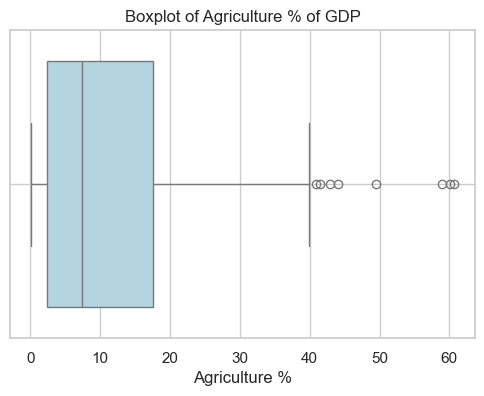

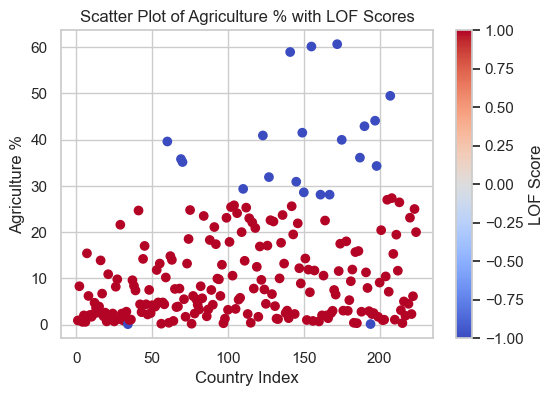

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
data = pd.read_csv('dataset.csv')

# Convert GDP values to numeric (if not already done)
for col in ['Agriculture GDP', 'Industry', 'Services']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Calculate Agriculture GDP as a percentage of total GDP
data['Agriculture %'] = data['Agriculture GDP'] / (data['Agriculture GDP'] + data['Industry'] + data['Services']) * 100

# Handle missing values by dropping rows with NaN values in 'Agriculture %'
data = data.dropna(subset=['Agriculture %'])

# 1. Boxplot of Agriculture %
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Agriculture %'], color='lightblue')
plt.title('Boxplot of Agriculture % of GDP')
plt.xlabel('Agriculture %')
plt.grid(True)
plt.show()

# 2. Scatter plot with LOF scores to detect outliers
# We will use the 'Agriculture %' column to detect outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # contamination is the expected proportion of outliers
data['LOF'] = lof.fit_predict(data[['Agriculture %']])

# Plotting the scatter plot with LOF scores
plt.figure(figsize=(6, 4))
plt.scatter(data.index, data['Agriculture %'], c=data['LOF'], cmap='coolwarm', label='LOF score')
plt.colorbar(label='LOF Score')
plt.title('Scatter Plot of Agriculture % with LOF Scores')
plt.xlabel('Country Index')
plt.ylabel('Agriculture %')
plt.grid(True)
plt.show()


In [25]:
print(data.columns)


Index(['Index Number ', 'Rank', 'Country/Economy', 'GDP (millions of $)',
       'Agriculture GDP', 'Unnamed: 5', 'Unnamed: 6', 'Industry', 'Unnamed: 8',
       'Unnamed: 9', 'Services', 'Unnamed: 11', 'Unnamed: 12', 'Year GDP ',
       'Year Sector', 'Agriculture %', 'LOF'],
      dtype='object')


C:\Users\aksha\AppData\Local\Temp\ipykernel_12232\3278427495.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Services', y='Country/Economy', data=top_countries_services, palette='viridis')


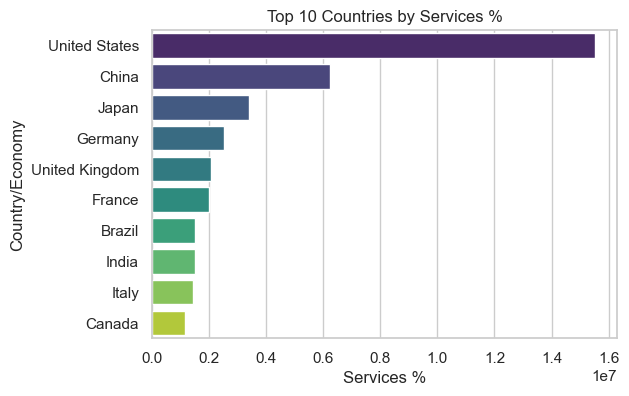

In [35]:
# Bar Plot: Top Countries by Services %
top_countries_services = data[['Country/Economy', 'Services']].nlargest(10, 'Services')

plt.figure(figsize=(6, 4))
sns.barplot(x='Services', y='Country/Economy', data=top_countries_services, palette='viridis')
plt.title('Top 10 Countries by Services %')
plt.xlabel('Services %')
plt.ylabel('Country/Economy')
plt.show()


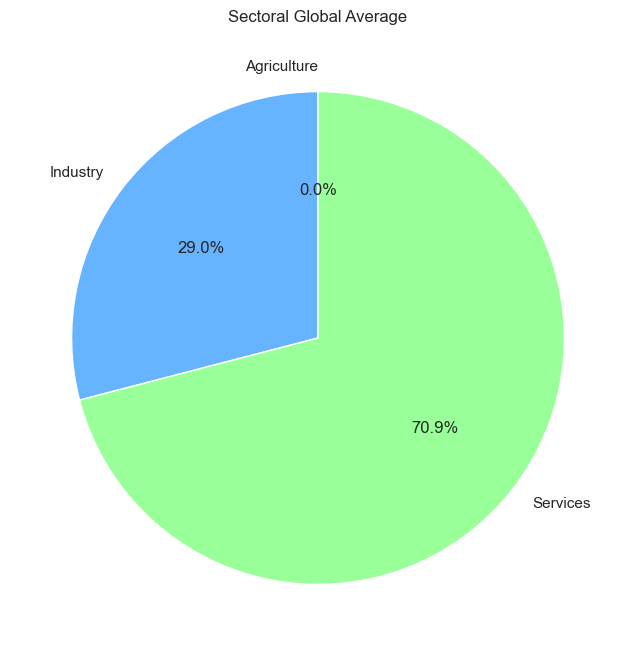

In [28]:
# Pie Chart: Sectoral Global Average
sector_avg = {
    'Agriculture': data['Agriculture %'].mean(),
    'Industry': data['Industry'].mean(),
    'Services': data['Services'].mean()
}

plt.figure(figsize=(8, 8))
plt.pie(sector_avg.values(), labels=sector_avg.keys(), autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF','#99FF99'])
plt.title('Sectoral Global Average')
plt.show()


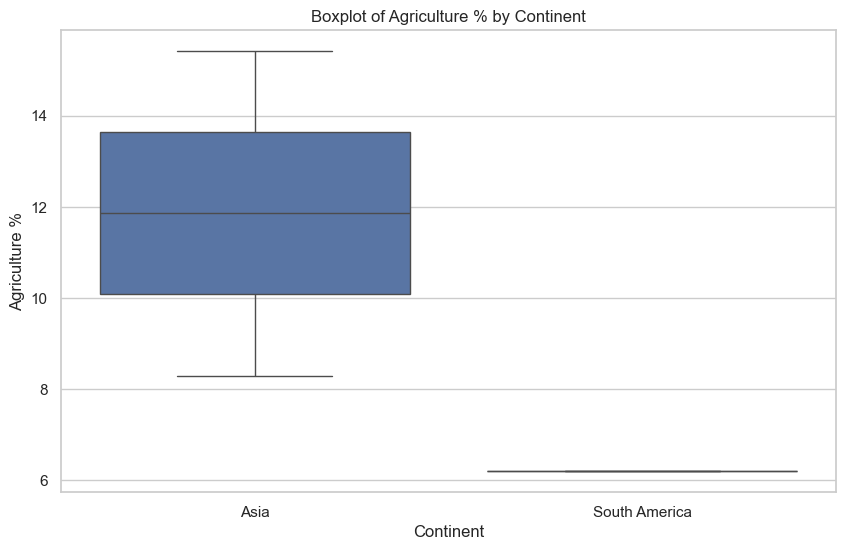

In [32]:
# Example mapping of countries to continents
continent_mapping = {
    'USA': 'North America', 'India': 'Asia', 'China': 'Asia', 'Brazil': 'South America', # Add more countries
    # ...
}

# Add a new column 'Continent'
data['Continent'] = data['Country/Economy'].map(continent_mapping)

# Now you can create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='Agriculture %', data=data)
plt.title('Boxplot of Agriculture % by Continent')
plt.show()
